**COURSE: PRDL/MLLB**

**PROJECT: Deep Learning**

**TEACHER: Luis Hernández Gómez**

**AUTHORS: MARONE Mamadou / RACHIDI Inass**

**NOTEBOOK: LSTM / BIDIRECTIONAL LSTM**

# SETUP

## INSTALLING MODULES

In [ ]:
%%capture
!pip install tensorflow
!pip install tqdm

In [ ]:
# os.chdir(r"C:\Users\maron\OneDrive\02-Documents\00.ETUDES\00.ECOLE_D_INGE\00.CYCLE_ING_FORMATION_INIT\00.3EME_ANNEE_INIT\00.A_COURS\00.PRDL\06.PROJECTS")

## IMPORTING LIBRARIES

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


#  Load and Prepare Data

In [ ]:
df_cleaned = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PROJET_DL_MLLB/DATA/CLEANED/corpus_cleaned.csv")
df_cleaned.head(3)

,category,title,body,text
0,ARTS & CULTURE,model agenc enabl sexual predat year former ag...,octob carolyn kramer receiv disturb phone call...,model agenc enabl sexual predat year former ag...
1,ARTS & CULTURE,actor jeff hiller talk bright color bold patte...,week talk actor jeff hiller hit broadway play ...,actor jeff hiller talk bright color bold patte...
2,ARTS & CULTURE,new yorker cover put trump hole racist comment,new yorker take presid donald trump ask u woul...,new yorker cover put trump hole racist comment...


In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
df_cleaned['encoded_labels'] = label_encoder.fit_transform(df_cleaned['category'])

In [ ]:
# Split the data into features and labels
X = df_cleaned['text']
y = df_cleaned['encoded_labels']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Tokenize and Pad Text Data

In [ ]:
# Tokenize the text
max_words = 10000
tokenizer = Tokenizer(num_words = max_words, oov_token = '<OOV>')
tokenizer.fit_on_texts(X_train)

In [ ]:
# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Pad sequences for equal length
max_length = 500
X_train_padded = pad_sequences(X_train_sequences, maxlen = max_length, padding = 'post', truncating = 'post')
X_test_padded = pad_sequences(X_test_sequences, maxlen = max_length, padding = 'post', truncating = 'post')

# LSTM Model

## Build the model

In [ ]:
model = Sequential()

# Embedding layer
embedding_dim = 64
model.add(Embedding(input_dim = max_words, output_dim = embedding_dim, input_length = max_length))

In [ ]:
# LSTM layer
#model.add(LSTM(128))
model.add(LSTM(512, activation = 'tanh', recurrent_activation = 'sigmoid'))

In [ ]:
# Output layer
num_classes = len(label_encoder.classes_)
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
# Compile the model
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Display the model summary
model.summary()

## Train the LSTM Model

In [ ]:
epochs = 40
batch_size = 10

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes = num_classes)
y_test_one_hot = to_categorical(y_test, num_classes = num_classes)

In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with one-hot encoded labels and EarlyStopping callback
history = model.fit(X_train_padded, y_train_one_hot, epochs=epochs, batch_size=batch_size, validation_split = 0.2)

Epoch 1/40
551/551 [==============================] - 51s 88ms/step - loss: 2.5854 - accuracy: 0.1376 - val_loss: 2.5362 - val_accuracy: 0.1512
Epoch 2/40
551/551 [==============================] - 30s 55ms/step - loss: 2.7326 - accuracy: 0.1085 - val_loss: 2.6897 - val_accuracy: 0.1497
Epoch 3/40
551/551 [==============================] - 22s 41ms/step - loss: 2.6509 - accuracy: 0.1222 - val_loss: 2.7465 - val_accuracy: 0.1199
Epoch 4/40
551/551 [==============================] - 19s 35ms/step - loss: 2.6052 - accuracy: 0.1245 - val_loss: 2.5888 - val_accuracy: 0.1381
Epoch 5/40
551/551 [==============================] - 20s 36ms/step - loss: 2.5717 - accuracy: 0.1234 - val_loss: 2.6431 - val_accuracy: 0.1497
Epoch 6/40
551/551 [==============================] - 19s 34ms/step - loss: 2.5546 - accuracy: 0.1245 - val_loss: 2.6744 - val_accuracy: 0.1206
Epoch 7/40
551/551 [==============================] - 18s 34ms/step - loss: 2.5246 - accuracy: 0.1371 - val_loss: 2.5803 - val_accuracy:

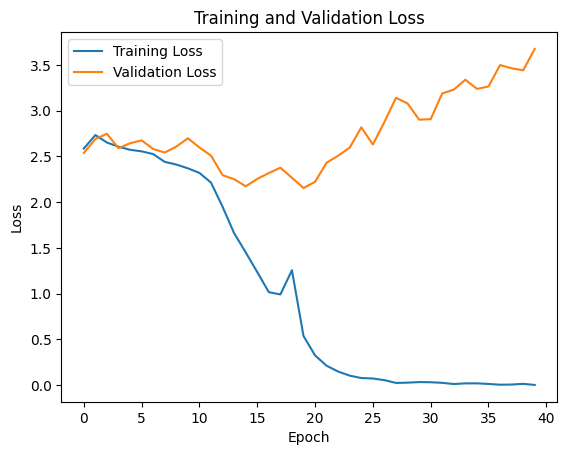

In [ ]:
# Plot training and validation loss values
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Notice:
- with the **default activation** functions:
    - The model underfits(0.17 accuracy) when we use **Adam** as optimizer algorithm. When We have changed it to **RMSprop**, we got 0.23 of accuracy and the underfitting decreases.
- with the activation functions **activation='tanh'** and **recurrent_activation='sigmoid'** :
    - the Adam perform better than the RMSprop (17% Vs 22%)
    - We have also tried the optimizer **Nadam**(17%)

## EVALUATION

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test_one_hot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

43/43 [==============================] - 1s 18ms/step - loss: 3.6734 - accuracy: 0.5349
Test Loss: 3.6733884811401367
Test Accuracy: 0.5348837375640869


In [ ]:
# Evaluate the model on the test set
y_pred = model.predict_classes(X_test_padded)

# Calculate additional metrics
accuracy = accuracy_score(y_test_one_hot, y_pred)
conf_matrix = confusion_matrix(y_test_one_hot, y_pred)
classification_rep = classification_report(y_test_one_hot, y_pred)

print("Test Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Extract precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_one_hot, y_pred, average='weighted')

print("Weighted Precision:", precision)
print("Weighted Recall:", recall)
print("Weighted F1 Score:", f1_score)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# BIDIRECTIONNAL LSTM

## Build the model

In [ ]:
model_bidir = Sequential()

# Embedding layer
model_bidir.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length))

# Bidirectional LSTM layer
model_bidir.add(Bidirectional(LSTM(512, activation='tanh', recurrent_activation='sigmoid')))

# Output layer
num_classes = len(label_encoder.classes_)
model_bidir.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_bidir.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model_bidir.summary()

## Train the LSTM Model

In [ ]:
epochs = 40
batch_size = 10

In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with one-hot encoded labels and EarlyStopping callback
history = model_bidir.fit(X_train_padded, y_train_one_hot, epochs=epochs, batch_size=batch_size, validation_split = 0.2)

In [ ]:
# Plot training and validation loss values
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## EVALUATION

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model_bidir.evaluate(X_test_padded, y_test_one_hot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict_classes(X_test_padded)

# Calculate additional metrics
accuracy = accuracy_score(y_test_one_hot, y_pred)
conf_matrix = confusion_matrix(y_test_one_hot, y_pred)
classification_rep = classification_report(y_test_one_hot, y_pred)

print("Test Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Extract precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_one_hot, y_pred, average='weighted')

print("Weighted Precision:", precision)
print("Weighted Recall:", recall)
print("Weighted F1 Score:", f1_score)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()